# 多項式回帰その２
- refactoringした状態でコードを書く

In [1]:
# load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn
import copy

C:\Users\YusukeSato\Anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


[-2.46063708  2.06857453  4.46141961  3.09289275  1.19901362  1.84669552
  1.27305555  7.82378406  5.73486176 -1.44992924 -0.08367098 -0.41619883
  4.16674605  0.59581403  1.79786089 -0.05981626  3.87954739 -0.48540183
 -4.68391266 -5.54241639 -3.50284443 -1.65282594  0.6844038   2.12420594
 -0.33188174 -2.90277247 -2.47644904 -1.3256104   1.09770148  3.01815395
 -4.83177135 -1.33228301  0.18238714 -0.84654558  3.41283486  0.29277185
 -0.28513876  3.99748582 -0.0477183   2.72842819 -5.52255432 -2.29864833
 -3.7716734   3.28593502  5.33040797 -0.39359086 -0.62696789 -9.18026617
  5.16306455  4.15741202 -7.1289679   0.48168784 -0.42907617  1.08148306
  2.54728836  1.5809294  -6.09205401  6.1353433   0.10837775  0.94450955
  4.26001685 -0.88431064 -0.40821291 -3.44937462  1.80718428 -5.26166847
  0.93092457  1.5968594   5.14338348 -1.11199708 -0.95712153 -3.23614981
 -3.39136201 -1.67245879 -3.54168071 -1.69072131 -1.60286364 -0.33810767
 -2.54730765 -1.28902414  0.51409937  2.81283871  0

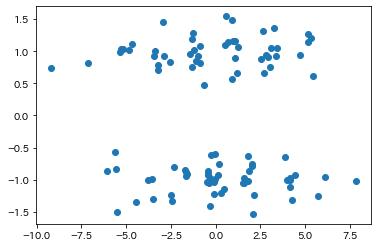

In [57]:
# data generate
n = 100
x = randn(n) * np.pi

# calculate y
# first term : if round(x) is odd(np.round(x) % 2 = 1), first term will be 1
# first term : if round(x) is even(np.round(x) % 2 = 0), first term will be -1
# second term : error term following normal distribution with mu=0, sd=0.2
y = (np.round(x) % 2 * 2 - 1) + (randn(n) * 0.2)

x_seq = np.arange(-8, 8, 0.2)

# check
print(x)
print(y)
print(-3%2)
print(-2%2)
print(x_seq)
plt.scatter(x,y)

In [71]:
# define function f
def f(x, g, beta):   # argument x:input data, g:input function(a little bit tricky!)
    # if g is cos, third term is cos2x and fourth term is cos3x
    # if g is sin, third term is sin2x and fourth term is sin3x
    return beta[0] + beta[1]*g(x) + beta[2]*g(2*x) + beta[3]*g(3*x)

In [72]:
# beta for cos
X = np.array([np.cos(x * i) for i in range(4)]).T
beta_cos = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_cos)

[-0.119225   -0.09232258  0.005854   -1.12252298]


In [73]:
# beta for sin
X = np.array([np.sin(x * i) for i in range(4)]).T + np.array([1, 0, 0, 0])
beta_sin = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_sin)

[-0.01988758  0.00626778 -0.02365369  0.28348773]


In [74]:
f(x_seq, np.cos, beta_sin)

array([ 0.12210217, -0.04174242, -0.19334569, -0.27991097, -0.27200534,
       -0.17367116, -0.02077287,  0.13180373,  0.22958384,  0.23773733,
        0.15336197,  0.00650653, -0.15042505, -0.26117114, -0.28551884,
       -0.21362472, -0.06970269,  0.09625007,  0.22582967,  0.2726501 ,
        0.21867938,  0.08076142, -0.09498816, -0.24899726, -0.32878408,
       -0.30709845, -0.19135018, -0.02104482,  0.14588106,  0.25307266,
        0.26516168,  0.17982765,  0.02834764, -0.13551816, -0.25439433,
       -0.28730841, -0.22387218, -0.08769467,  0.07212971,  0.19844128,
        0.24621423,  0.19844128,  0.07212971, -0.08769467, -0.22387218,
       -0.28730841, -0.25439433, -0.13551816,  0.02834764,  0.17982765,
        0.26516168,  0.25307266,  0.14588106, -0.02104482, -0.19135018,
       -0.30709845, -0.32878408, -0.24899726, -0.09498816,  0.08076142,
        0.21867938,  0.2726501 ,  0.22582967,  0.09625007, -0.06970269,
       -0.21362472, -0.28551884, -0.26117114, -0.15042505,  0.00

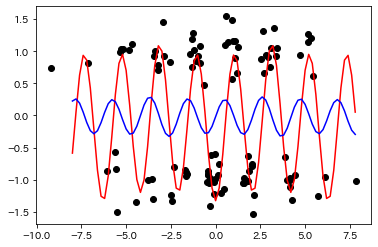

In [76]:
plt.scatter(x, y, c='black')
plt.plot(x_seq, f(x_seq, np.cos, beta_cos), c='red')
plt.plot(x_seq, f(x_seq, np.sin, beta_sin), c='blue')